In [152]:
import gssapi
import singlestoredb
import pandas as pd
import numpy as np
import psycopg2
import pymysql
import matplotlib.pyplot as plt 
detalles = pd.read_excel(r'C:\Users\roquispec\OneDrive - LUZ DEL SUR S.A.A\Documentos\Estudios de Ingreso\ProyectoRyD_V2\Basededatos\detalles_transformadores.xlsx')

In [153]:
import singlestoredb as s2
import pandas as pd
import json

try:
    # CONEXIÓN ULTRA COMPACTA - 1 LÍNEA
    with s2.connect(**json.load(open('config.json'))['singlestore']) as connection:
        print("✅ Conexión a SingleStore establecida correctamente")
        
        # CONSULTA SQL SIMPLIFICADA
        consulta_sql = """
SELECT
    CASE
        WHEN cod_scada LIKE 'ASIA/%' THEN 'Asia'
        WHEN cod_scada LIKE 'ALTOPRAD/%' THEN 'Alto Pradera'
        WHEN cod_scada LIKE 'BALNEARI/%' THEN 'Balnearios'
        WHEN cod_scada LIKE 'SBARTOLO/%' THEN 'San Bartolo'
        WHEN cod_scada LIKE 'CANTERA/%' THEN 'Cantera'
        WHEN cod_scada LIKE 'MANCHAY/%' THEN 'Manchay'
        WHEN cod_scada LIKE 'PACHACUT/%' THEN 'Pachacutec'
        WHEN cod_scada LIKE 'PROGRESO/%' THEN 'Progreso'
        WHEN cod_scada LIKE 'SANJUAN/%' THEN 'San Juan'
        WHEN cod_scada LIKE 'SANLUIS/%' THEN 'San Luis'
        WHEN cod_scada LIKE 'SROSAN/%' THEN 'Santa Rosa Nueva'
        WHEN cod_scada LIKE 'LURIN/%' THEN 'Lurín'
        WHEN cod_scada LIKE 'CHILCA/%' THEN 'Chilca'
        WHEN cod_scada LIKE 'BUJAMA/%' THEN 'Bujama'
        WHEN cod_scada LIKE 'SALAMANC/%' THEN 'Salamanca'
        ELSE 'Desconocido'
    END AS nombre_subestacion,
    celda,
    fecha_hora,
    pot_aparente,
    temp_ambiente
FROM scada_lectura
WHERE (pot_aparente IS NOT NULL) AND (temp_ambiente IS NOT NULL)
  AND celda IN ('TRF1', 'TRF2', 'TRF3', 'TRF4', 'TRF5', 'TRA1', 'TRA2', 'TRA3', 'TRA4', 'TRA5')
ORDER BY fecha_hora DESC;
"""
                         
        # EJECUTAR CONSULTA
        df = pd.read_sql(consulta_sql, connection)
        print(f"✅ Datos extraídos: {len(df)} registros")
        
        # MOSTRAR RESULTADOS
        print("Primeras 5 filas:")
        print(df.head())
        
        # GUARDAR CSV (OPCIONAL)
        # df.to_csv('datos_scada.csv', index=False)
        # print("💾 Datos guardados en 'datos_scada.csv'")
        
except Exception as e:
    print(f"❌ Error: {e}")

print("✅ Proceso completado")

✅ Conexión a SingleStore establecida correctamente


C:\Users\roquispec\AppData\Local\Temp\ipykernel_6092\2255254093.py:42: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



✅ Datos extraídos: 370588 registros
Primeras 5 filas:
  nombre_subestacion celda          fecha_hora  pot_aparente  temp_ambiente
0             Chilca  TRF2 2025-11-10 23:45:00        25.948         18.105
1           San Luis  TRA2 2025-11-10 23:45:00        10.499         20.500
2         Balnearios  TRF3 2025-11-10 23:45:00        17.047          0.000
3              Lurín  TRF2 2025-11-10 23:45:00        15.993       -998.900
4           Progreso  TRA1 2025-11-10 23:45:00        23.164         18.385
✅ Proceso completado


In [154]:
# Renombrar columnas para hacer 'merge'
df = df.rename(columns={'nombre_subestacion': 'SUBESTACION','celda':'CIRCUITO'})
# Eliminar columna cod_scada antes de separarla
# df = df.drop(columns=['cod_scada'])
df.head(20)

,SUBESTACION,CIRCUITO,fecha_hora,pot_aparente,temp_ambiente
0,Chilca,TRF2,2025-11-10 23:45:00,25.948,18.105
1,San Luis,TRA2,2025-11-10 23:45:00,10.499,20.500
2,Balnearios,TRF3,2025-11-10 23:45:00,17.047,0.000
3,Lurín,TRF2,2025-11-10 23:45:00,15.993,-998.900
4,Progreso,TRA1,2025-11-10 23:45:00,23.164,18.385
5,San Juan,TRF1,2025-11-10 23:45:00,17.523,19.078
6,Salamanca,TRF1,2025-11-10 23:45:00,0.000,19.046
7,Bujama,TRF1,2025-11-10 23:45:00,0.000,18.043
8,San Bartolo,TRF2,2025-11-10 23:45:00,3.295,18.019
9,Chilca,TRF1,2025-11-10 23:45:00,0.000,21.213


In [155]:
# Unir todos los datos de df pero solo la columna SERIE de detalles
df_resultado = pd.merge(df, 
                        detalles[['SUBESTACION', 'CIRCUITO', 'SERIE','POT. INSTALADA','TIPO']], 
                        on=['SUBESTACION', 'CIRCUITO'], 
                        how='inner')
df_resultado["SERIE"] = df_resultado["SERIE"].astype(str)
df_resultado['SERIE'] = df_resultado['SERIE'].astype(str).str.replace(" ", "")

In [156]:
df_resultado.head(20)

,SUBESTACION,CIRCUITO,fecha_hora,pot_aparente,temp_ambiente,SERIE,POT. INSTALADA,TIPO
0,San Luis,TRA2,2025-11-10 23:45:00,10.499,20.500,V147106,50.0,Termoestabilizado
1,Balnearios,TRF3,2025-11-10 23:45:00,17.047,0.000,364072,50.0,Termoestabilizado
2,Lurín,TRF2,2025-11-10 23:45:00,15.993,-998.900,V101039,50.0,Termoestabilizado
3,Progreso,TRA1,2025-11-10 23:45:00,23.164,18.385,V147105,50.0,0
4,San Juan,TRF1,2025-11-10 23:45:00,17.523,19.078,364078,50.0,Termoestabilizado
5,San Juan,TRF1,2025-11-10 23:45:00,17.523,19.078,348447,NaN,NaN
6,Salamanca,TRF1,2025-11-10 23:45:00,0.000,19.046,364077,50.0,Termoestabilizado
7,Bujama,TRF1,2025-11-10 23:45:00,0.000,18.043,B611545,25.0,Termoestabilizado
8,San Bartolo,TRF2,2025-11-10 23:45:00,3.295,18.019,750019-01,25.0,Termoestabilizado
9,Chilca,TRF1,2025-11-10 23:45:00,0.000,21.213,185466,25.0,Termoestabilizado


In [ ]:
# Primero calcular el promedio por SERIE usando SOLO valores dentro del rango [-100, 200]
promedios_por_serie = df_resultado[
    (df_resultado['temp_ambiente'] >= -100) & (df_resultado['temp_ambiente'] <= 200)
].groupby('SERIE')['temp_ambiente'].mean()

# Luego reemplazar los valores fuera de rango con el promedio de su serie
df_resultado['temp_ambiente'] = df_resultado.apply(
    lambda row: promedios_por_serie.get(row['SERIE'], row['temp_ambiente']) 
    if (row['temp_ambiente'] < -100 or row['temp_ambiente'] > 200) 
    else row['temp_ambiente'],
    axis=1
)


In [158]:
df_resultado.head(20)

,SUBESTACION,CIRCUITO,fecha_hora,pot_aparente,temp_ambiente,SERIE,POT. INSTALADA,TIPO
0,San Luis,TRA2,2025-11-10 23:45:00,10.499,20.50000,V147106,50.0,Termoestabilizado
1,Balnearios,TRF3,2025-11-10 23:45:00,17.047,0.00000,364072,50.0,Termoestabilizado
2,Lurín,TRF2,2025-11-10 23:45:00,15.993,28.67343,V101039,50.0,Termoestabilizado
3,Progreso,TRA1,2025-11-10 23:45:00,23.164,18.38500,V147105,50.0,0
4,San Juan,TRF1,2025-11-10 23:45:00,17.523,19.07800,364078,50.0,Termoestabilizado
5,San Juan,TRF1,2025-11-10 23:45:00,17.523,19.07800,348447,NaN,NaN
6,Salamanca,TRF1,2025-11-10 23:45:00,0.000,19.04600,364077,50.0,Termoestabilizado
7,Bujama,TRF1,2025-11-10 23:45:00,0.000,18.04300,B611545,25.0,Termoestabilizado
8,San Bartolo,TRF2,2025-11-10 23:45:00,3.295,18.01900,750019-01,25.0,Termoestabilizado
9,Chilca,TRF1,2025-11-10 23:45:00,0.000,21.21300,185466,25.0,Termoestabilizado


In [159]:
# Convertir la columna fecha_hora a datetime si no lo está
df_resultado['fecha_hora'] = pd.to_datetime(df_resultado['fecha_hora'])

# Seleccionar solo un día específico (por ejemplo, el primer día disponible)
# df_un_dia = df_resultado[df_resultado['fecha_hora'].dt.date == df_resultado['fecha_hora'].dt.date.iloc[0]]

# O si quieres un día específico, por ejemplo 9 de noviembre de 2025:
df_un_dia = df_resultado[df_resultado['fecha_hora'].dt.date == pd.to_datetime('2025-11-10').date()]

print(f"DataFrame original: {len(df_resultado)} registros")
print(f"DataFrame un día: {len(df_un_dia)} registros")
print(f"Rango de fechas: {df_un_dia['fecha_hora'].min()} a {df_un_dia['fecha_hora'].max()}")

DataFrame original: 427554 registros
DataFrame un día: 1536 registros
Rango de fechas: 2025-11-10 00:00:00 a 2025-11-10 23:45:00


In [160]:
df_resultado[(df_resultado['SUBESTACION'] == 'San Bartolo') & (df_resultado['CIRCUITO'] == 'TRF2')].head(20)

,SUBESTACION,CIRCUITO,fecha_hora,pot_aparente,temp_ambiente,SERIE,POT. INSTALADA,TIPO
8,San Bartolo,TRF2,2025-11-10 23:45:00,3.295,18.019,750019-01,25.0,Termoestabilizado
29,San Bartolo,TRF2,2025-11-10 23:30:00,3.324,18.053,750019-01,25.0,Termoestabilizado
47,San Bartolo,TRF2,2025-11-10 23:15:00,3.226,18.220,750019-01,25.0,Termoestabilizado
51,San Bartolo,TRF2,2025-11-10 23:00:00,3.217,18.343,750019-01,25.0,Termoestabilizado
71,San Bartolo,TRF2,2025-11-10 22:45:00,3.214,18.379,750019-01,25.0,Termoestabilizado
83,San Bartolo,TRF2,2025-11-10 22:30:00,3.207,18.305,750019-01,25.0,Termoestabilizado
111,San Bartolo,TRF2,2025-11-10 22:15:00,3.183,18.253,750019-01,25.0,Termoestabilizado
127,San Bartolo,TRF2,2025-11-10 22:00:00,3.221,18.275,750019-01,25.0,Termoestabilizado
140,San Bartolo,TRF2,2025-11-10 21:45:00,3.336,18.384,750019-01,25.0,Termoestabilizado
154,San Bartolo,TRF2,2025-11-10 21:30:00,3.285,18.350,750019-01,25.0,Termoestabilizado


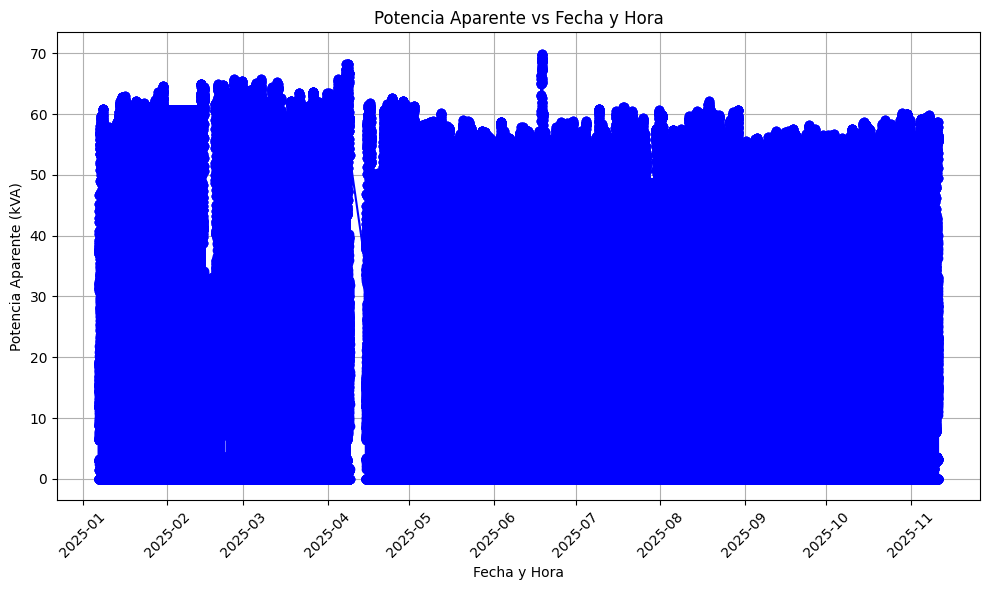

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna fecha_hora esté en formato datetime
df_resultado['fecha_hora'] = pd.to_datetime(df_resultado['fecha_hora'])

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_resultado['fecha_hora'], df_resultado['pot_aparente'], marker='o', linestyle='-', color='blue')

# Personalizar el gráfico
plt.title('Potencia Aparente vs Fecha y Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia Aparente (kVA)')
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [162]:
def Sobrecarga(load_factors_K_P, ambient_temps_theta_a_P, potencia, tipo):

    load_factors_K_P = load_factors_K_P/potencia

    # --- 1. Establecer los parámetros del transformador ---
    # Estos parámetros se mantienen como en el ejemplo del Anexo I [1]
    delta_theta_or = 52 # Aumento de la temperatura del aceite superior a la carga nominal (K)
    tau_o = 150         # Constante de tiempo del aceite (min)
    R = 6              # Relación de pérdidas (R)
    y = 1.3             # Exponente del devanado (y)
    k21 = 2             # Constante térmica (k21)
    delta_theta_hr =26 # Aumento de la temperatura del punto caliente sobre la del aceite superior a la corriente nominal (K)
    tau_w = 7           # Constante de tiempo del devanado (min)
    x = 0.8             # Exponente del aceite (x)
    k11 = 0.5           # Constante térmica (k11)
    k22 = 2             # Constante térmica (k22)
    
    # Constantes para el cálculo de la pérdida de vida (para papel térmicamente mejorado)
    # Temperatura del punto caliente de referencia para V=1 (°C) [2]
    REF_THETA_H = 110
    # Constante en el exponente de la ecuación de envejecimiento (15000 en Eq. 3) [2]
    CONST_EXP_AGEING = 15000
    
    # # --- 2. Establecer los datos de entrada [4] ---
    # # Estos son los datos de la Tabla I.1
    # times_t_min = list(range(0,41))
    # ambient_temps_theta_a = [30.3, 29.9, 29.8, 29.5, 29.6, 29.5, 29.5, 28.9, 29.0, 28.6, 28.0, 28.7, 27.8, 28.1, 27.9, 27.1, 26.9, 26.7, 27.2, 26.7, 26.9, 26.5, 26.2, 26.3, 25.4, 25.6, 25.3, 24.8, 24.5, 24.3, 24.1, 24.3, 24.1, 23.4, 23.6, 23.8, 23.1, 23.3, 23.1, 22.3, 22.2]
    # load_factors_K = [0.81, 0.87, 0.88, 0.86, 0.90, 0.92, 0.95, 0.96, 0.97, 1.00, 1.70, 1.70, 1.73, 1.72, 1.69, 1.68, 1.71, 1.69, 1.67, 1.68, 1.63, 1.59, 1.53, 1.49, 1.41, 1.38, 1.32, 1.28, 1.21, 1.19, 0.87, 0.88, 0.87, 0.86, 0.85, 0.87, 0.83, 0.86, 0.85, 0.82, 0.86]
    
    # load_factors_K_P = [1]*96
    # ambient_temps_theta_a_P = [30]*96 
    
    times_t_min_P = list(range(1,97))
    
    # --- Crear las nuevas listas con cada elemento repetido 15 veces ---
    # [expresion for elemento in lista_original for _ in range(veces_a_repetir)]
    times_t_min = [time for time in times_t_min_P for _ in range(15)]
    ambient_temps_theta_a = [temp for temp in ambient_temps_theta_a_P for _ in range(15)]
    load_factors_K = [load for load in load_factors_K_P for _ in range(15)]
    
    # Paso de tiempo para las ecuaciones de diferencias (min) [5]
    delta_t = 9
    # delta_t = 3
    
    # Listas para almacenar los resultados a lo largo del tiempo
    theta_o_results = []
    delta_theta_h1_results = []
    delta_theta_h2_results = []
    delta_theta_h_results = []
    theta_h_results = []
    loss_of_life_min_results = []
    loss_of_life_days_results = []
    
    # --- 3. Calcular las condiciones iniciales (n=0, t=0) ---
    # Se utilizan los valores iniciales dados en el Anexo I para t=0 [3, 4]
    current_theta_o = 82 # Temperatura del aceite superior (°C)
    current_delta_theta_h1 = 52 # Primer término del aumento de temperatura del punto caliente (K)
    current_delta_theta_h2 = 26 # Segundo término del aumento de temperatura del punto caliente (K)
    current_loss_of_life_min = 0 # Pérdida de vida acumulada (min)
    
    
    # Almacenar las condiciones iniciales en las listas de resultados
    theta_o_results.append(current_theta_o)
    delta_theta_h1_results.append(current_delta_theta_h1)
    delta_theta_h2_results.append(current_delta_theta_h2)
    # Calcular delta_theta_h para el estado inicial según Eq. (22) [5]
    initial_delta_theta_h = current_delta_theta_h1 - current_delta_theta_h2
    delta_theta_h_results.append(initial_delta_theta_h)
    # Calcular theta_h para el estado inicial según Eq. (23) [6]
    theta_h_results.append(current_theta_o + initial_delta_theta_h)
    loss_of_life_min_results.append(current_loss_of_life_min)
    # Convertir minutos a días (1440 min en un día)
    loss_of_life_days_results.append(current_loss_of_life_min / 1440)
    
    # --- 4. Resolver las ecuaciones de diferencias [8-10] ---
    # El bucle comienza desde el paso 1 (n=1) ya que las condiciones iniciales (n=0) ya están establecidas.
    for n in range(1, len(times_t_min)):
    # for n in range(1, len(times_t_min)):
        # Recuperar los valores del paso de tiempo anterior (n-1)
        prev_theta_o = theta_o_results[-1]
        prev_delta_theta_h1 = delta_theta_h1_results[-1]
        prev_delta_theta_h2 = delta_theta_h2_results[-1]
        prev_loss_of_life_min = loss_of_life_min_results[-1]
    
        # Obtener los datos de entrada para el paso de tiempo actual (n)
        current_K = load_factors_K[n]
        current_theta_a = ambient_temps_theta_a[n]
    
        # Calcular el cambio en la temperatura del aceite superior (D_theta_o) - Ecuación (18) [7]
        term_oil_factor = (1 + R * current_K**2) / (1 + R)
        main_term_theta_o = delta_theta_or * (term_oil_factor**x)
        D_theta_o = (delta_t / (tau_o * k11)) * (main_term_theta_o - (prev_theta_o - current_theta_a))
    
        # Calcular la nueva temperatura del aceite superior (theta_o(n)) - Ecuación (19) [5]
        current_theta_o = prev_theta_o + D_theta_o
        theta_o_results.append(current_theta_o)
    
        # Calcular el cambio en el primer término del aumento de temperatura del punto caliente (D_delta_theta_h1) - Ecuación (20) [5]
        main_term_h1 = delta_theta_hr * k21 * (current_K**y)
        D_delta_theta_h1 = (delta_t / (tau_w * k22)) * (main_term_h1 - prev_delta_theta_h1)
    
        # Calcular el nuevo primer término del aumento de temperatura del punto caliente (delta_theta_h1(n))
        current_delta_theta_h1 = prev_delta_theta_h1 + D_delta_theta_h1
        delta_theta_h1_results.append(current_delta_theta_h1)
    
        # Calcular el cambio en el segundo término del aumento de temperatura del punto caliente (D_delta_theta_h2) - Ecuación (21) [5]
        # Nota: El tiempo constante para este término es (tau_o / k22), según las Ecuaciones (8) y (21).
        main_term_h2 = delta_theta_hr * (k21 - 1) * (current_K**y)
        D_delta_theta_h2 = (delta_t / (tau_o / k22)) * (main_term_h2 - prev_delta_theta_h2)
    
        # Calcular el nuevo segundo término del aumento de temperatura del punto caliente (delta_theta_h2(n))
        current_delta_theta_h2 = prev_delta_theta_h2 + D_delta_theta_h2
        delta_theta_h2_results.append(current_delta_theta_h2)
    
        # Calcular el aumento total de la temperatura del punto caliente (delta_theta_h(n)) - Ecuación (22) [5]
        current_delta_theta_h = current_delta_theta_h1 - current_delta_theta_h2
        delta_theta_h_results.append(current_delta_theta_h)
    
        # Calcular la temperatura final del punto caliente (theta_h(n)) - Ecuación (23) [6]
        current_theta_h = current_theta_o + current_delta_theta_h
        theta_h_results.append(current_theta_h)
    
        # Calcular la tasa de envejecimiento relativo (V) - Ecuación (3) [2]
        # Se utiliza la referencia de 110 °C para papel térmicamente mejorado.
        if tipo == "termoestabilizado": #kraft
            V = math.exp(CONST_EXP_AGEING / (273 + REF_THETA_H) - CONST_EXP_AGEING / (273 + current_theta_h))
            # V = math.exp((current_theta_h-98)/6)
        else:
            V = 2**((current_theta_h - 98) / 6)
    
        # Calcular la pérdida de vida en este paso de tiempo (D_loss_of_life) - Ecuación (25) [8]
        D_loss_of_life = V * delta_t
    
        # Calcular la pérdida de vida acumulada (L(n)) - Ecuación (26) [8]
        current_loss_of_life_min = prev_loss_of_life_min + D_loss_of_life
        loss_of_life_min_results.append(current_loss_of_life_min)
        loss_of_life_days_results.append(current_loss_of_life_min / 1440) # Convertir a días
    
    
    # --- 6. Graficar los resultados ---
    fig, ax1 = plt.subplots(figsize=(15, 7)) # Crea una figura y el eje principal para las temperaturas
    
    # Plotear las temperaturas en el eje principal (ax1)
    ax1.plot(times_t_min[10:], theta_h_results[10:], color='red', label='Temperatura del Punto Caliente ($\Theta_h$)', linewidth=1.5)
    ax1.plot(times_t_min[10:], theta_o_results[10:], color='orange', linestyle='--', label='Temperatura del Aceite Superior ($\Theta_o$)', linewidth=1.5)
    ax1.plot(times_t_min[10:], ambient_temps_theta_a[10:], color='green', linestyle=':', label='Temperatura Ambiente ($\Theta_a$)', linewidth=1.5)
    
    # --- Nueva línea constante para el límite de HST ---
    # np.full(num_elements, 120) crea un array de 1440 elementos, todos con valor 120
    ax1.plot(times_t_min, np.full(len(times_t_min), 120), color='purple', linestyle='-.', label='Lim HST (120 °C)', linewidth=1.5)
    
    
    # Configuración del eje principal
    ax1.set_xlabel("Tiempo (min)", fontsize=12)
    ax1.set_ylabel("Temperatura (°C)", fontsize=12, color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_title("Evolución de Temperaturas y Factor de Carga del Transformador", fontsize=14)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Crear un segundo eje Y (secundario) para el factor de carga
    ax2 = ax1.twinx()
    ax2.plot(times_t_min, load_factors_K, color='blue', linestyle='-.', label='Factor de Carga (K)', linewidth=1.5)
    ax2.set_ylabel("Factor de Carga (p.u.)", fontsize=12, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_ylim(bottom=0) # Asegura que el eje Y del factor de carga empiece en 0 o un valor razonable
    ax2.set_ylim(0, 1.4) # <--- MODIFICACIÓN AQUÍ: Ajusta el rango vertical de 0.0 a 2.0
    
    # Combinar leyendas de ambos ejes y colocarla en la parte inferior central del gráfico
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower center', ncol=2, frameon=True, bbox_to_anchor=(0.5, -0.2))
    
    
    # Mejorar la legibilidad del eje X
    plt.xticks(rotation=45, ha="right") # Rotar las etiquetas de tiempo
    plt.tight_layout() # Ajusta el diseño para asegurar que todo quepa sin superposiciones
    
    # Mostrar el gráfico
    plt.show()
    
    return times_t_min, load_factors_K, ambient_temps_theta_a, theta_o_results, theta_h_results, loss_of_life_min_results, loss_of_life_days_results

<>:144: SyntaxWarning:

invalid escape sequence '\T'

<>:145: SyntaxWarning:

invalid escape sequence '\T'

<>:146: SyntaxWarning:

invalid escape sequence '\T'

<>:144: SyntaxWarning:

invalid escape sequence '\T'

<>:145: SyntaxWarning:

invalid escape sequence '\T'

<>:146: SyntaxWarning:

invalid escape sequence '\T'

C:\Users\roquispec\AppData\Local\Temp\ipykernel_6092\2109687204.py:144: SyntaxWarning:

invalid escape sequence '\T'

C:\Users\roquispec\AppData\Local\Temp\ipykernel_6092\2109687204.py:145: SyntaxWarning:

invalid escape sequence '\T'

C:\Users\roquispec\AppData\Local\Temp\ipykernel_6092\2109687204.py:146: SyntaxWarning:

invalid escape sequence '\T'



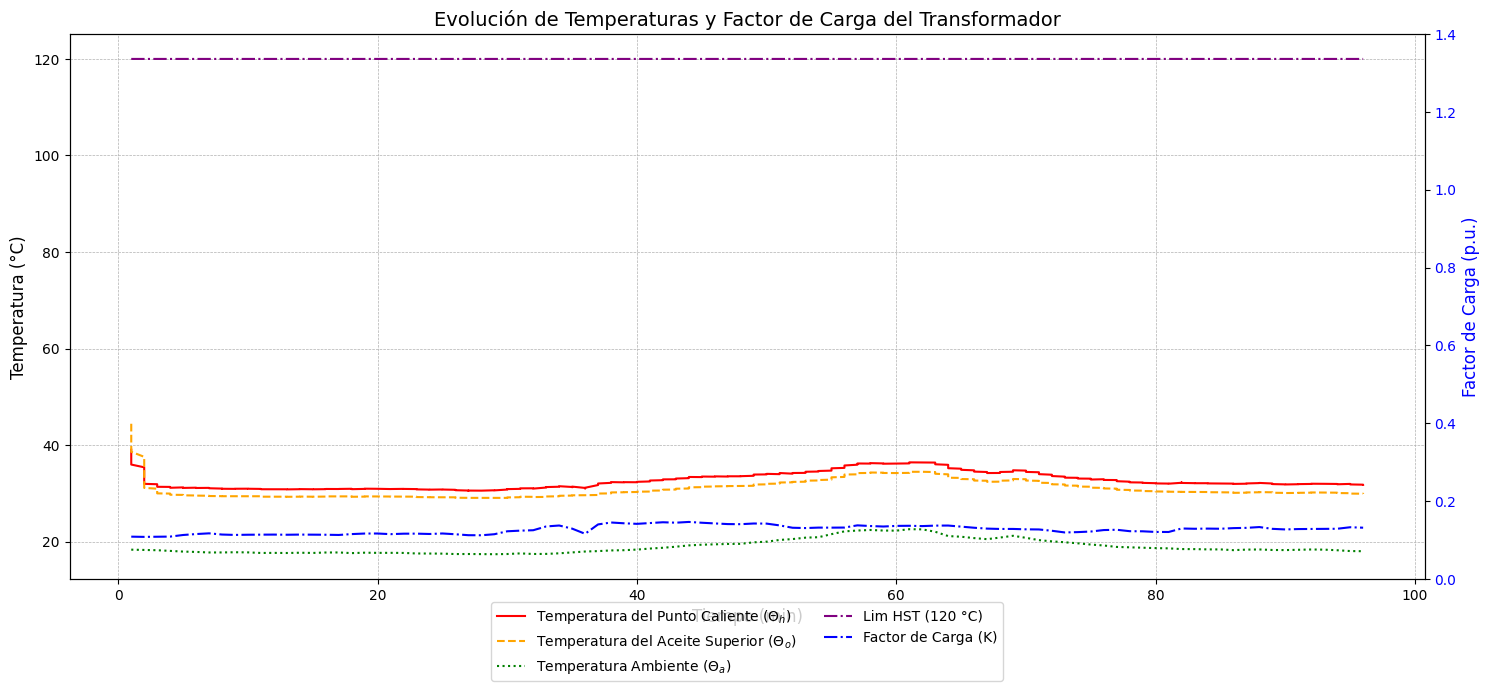

In [163]:
# Preparar datos para un transformador específico
subestacion = "San Bartolo"
circuito = "TRF2"

# Filtrar datos del transformador
df_transf = df_un_dia[
    (df_un_dia['SUBESTACION'] == subestacion) & 
    (df_un_dia['CIRCUITO'] == circuito)
].sort_values('fecha_hora')

# Extraer arrays necesarios
load_factors_K_P = df_transf['pot_aparente'].values
ambient_temps_theta_a_P = df_transf['temp_ambiente'].fillna(25).values  # Fill NaN con 25°C
potencia = df_transf['POT. INSTALADA'].iloc[0]
tipo = df_transf['TIPO'].iloc[0] if pd.notna(df_transf['TIPO'].iloc[0]) else "normal"

# Llamar a la función Sobrecarga
resultados = Sobrecarga(load_factors_K_P, ambient_temps_theta_a_P, potencia, tipo)

In [164]:
resultados

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
 

In [165]:
# Convertir a arrays de numpy para mejor visualización
import numpy as np

times_t_min = np.array(resultados[0])
load_factors_K = np.array(resultados[1])
ambient_temps_theta_a = np.array(resultados[2])
theta_o_results = np.array(resultados[3])
theta_h_results = np.array(resultados[4])
loss_of_life_min_results = np.array(resultados[5])
loss_of_life_days_results = np.array(resultados[6])

# Ver las primeras 20 filas de forma ordenada
print("=== PRIMERAS 20 FILAS ===")
for i in range(30):
    print(f"Min {times_t_min[i]:3d} | K: {load_factors_K[i]:6.4f} | Temp_A: {ambient_temps_theta_a[i]:6.2f} | Temp_O: {theta_o_results[i]:6.2f} | Temp_H: {theta_h_results[i]:6.2f} | Vida_m: {loss_of_life_min_results[i]:8.6f} | Vida_d: {loss_of_life_days_results[i]:8.6f}")

# Ver las últimas 10 filas
print("\n=== ÚLTIMAS 10 FILAS ===")
for i in range(-10, 0):
    print(f"Min {times_t_min[i]:3d} | K: {load_factors_K[i]:6.4f} | Temp_A: {ambient_temps_theta_a[i]:6.2f} | Temp_O: {theta_o_results[i]:6.2f} | Temp_H: {theta_h_results[i]:6.2f} | Vida_m: {loss_of_life_min_results[i]:8.6f} | Vida_d: {loss_of_life_days_results[i]:8.6f}")

# Resumen estadístico
print("\n=== RESUMEN ESTADÍSTICO ===")
print(f"Temperatura punto caliente - Max: {theta_h_results.max():.2f}°C, Min: {theta_h_results.min():.2f}°C")
print(f"Temperatura aceite - Max: {theta_o_results.max():.2f}°C, Min: {theta_o_results.min():.2f}°C")
print(f"Pérdida de vida total: {loss_of_life_days_results[-1]:.6f} días")

# Crear DataFrame para visualización completa
df_resultados = pd.DataFrame({
    'Minuto': times_t_min,
    'Factor_Carga': load_factors_K,
    'Temp_Ambiente': ambient_temps_theta_a,
    'Temp_Aceite': theta_o_results,
    'Temp_Punto_Caliente': theta_h_results,
    'Perdida_Vida_dias': loss_of_life_days_results
})

print("\n=== DATAFRAME COMPLETO (primeras 10 filas) ===")
print(df_resultados.head(10))
df_resultado.to_csv('resultados.csv', index=False, encoding='utf-8', sep=',')

=== PRIMERAS 20 FILAS ===
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  82.00 | Temp_H: 108.00 | Vida_m: 0.000000 | Vida_d: 0.000000
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  75.75 | Temp_H:  73.14 | Vida_m: 0.509078 | Vida_d: 0.000354
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  70.25 | Temp_H:  58.96 | Vida_m: 0.608026 | Vida_d: 0.000422
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  65.41 | Temp_H:  52.37 | Vida_m: 0.654272 | Vida_d: 0.000454
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  61.15 | Temp_H:  48.68 | Vida_m: 0.684471 | Vida_d: 0.000475
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  57.40 | Temp_H:  46.19 | Vida_m: 0.707108 | Vida_d: 0.000491
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  54.11 | Temp_H:  44.26 | Vida_m: 0.725227 | Vida_d: 0.000504
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  51.20 | Temp_H:  42.66 | Vida_m: 0.740289 | Vida_d: 0.000514
Min   1 | K: 0.1088 | Temp_A:  18.34 | Temp_O:  48.65 | Temp_H:  41.29 | Vida_m: 0.753140 | Vida_d: 0.

In [166]:
import pandas as pd

# Crear DataFrame con todas las columnas
df_resultados = pd.DataFrame({
    'Minuto': times_t_min,
    'Factor_Carga': load_factors_K,
    'Temp_Ambiente': ambient_temps_theta_a,
    'Temp_Aceite': theta_o_results,
    'Temp_Punto_Caliente': theta_h_results,
    'Vida_min': loss_of_life_min_results,
    'Vida_dias': loss_of_life_days_results
})

# Guardar en CSV con formato adecuado
df_resultados.to_csv('resultados_completos.csv', index=False, encoding='utf-8', sep=',')

print("Archivo 'resultados_completos.csv' generado correctamente.")

Archivo 'resultados_completos.csv' generado correctamente.


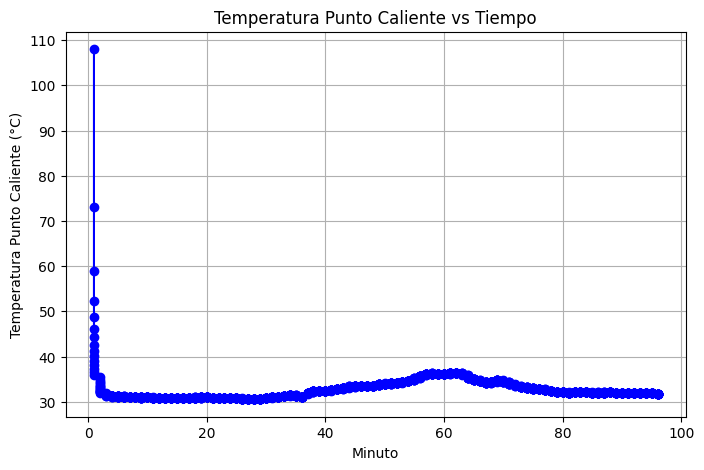

In [167]:
import matplotlib.pyplot as plt

# Ejemplo: graficar Minuto vs Temp_Punto_Caliente
plt.figure(figsize=(8, 5))
plt.plot(times_t_min, theta_h_results, color='blue', marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Minuto')
plt.ylabel('Temperatura Punto Caliente (°C)')
plt.title('Temperatura Punto Caliente vs Tiempo')
plt.grid(True)

# Mostrar gráfico
plt.show()